# Support Vector Machine for Predicting Wine Quality

## Data Preprocessing

### Import Required Libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import math

### Load the Dataset

In [106]:
df = pd.read_csv("../../data/raw/winequality-red.csv")

### Preview the data

In [107]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Print basic info about the dataset

In [108]:
df.info()
print("Shape of dataset:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Shape of dataset: (1599, 12)


### Statistical Summary

In [109]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### checking for null values

In [110]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Exploratory Data Analysis

### 1.Plot distribution of each numerical feature

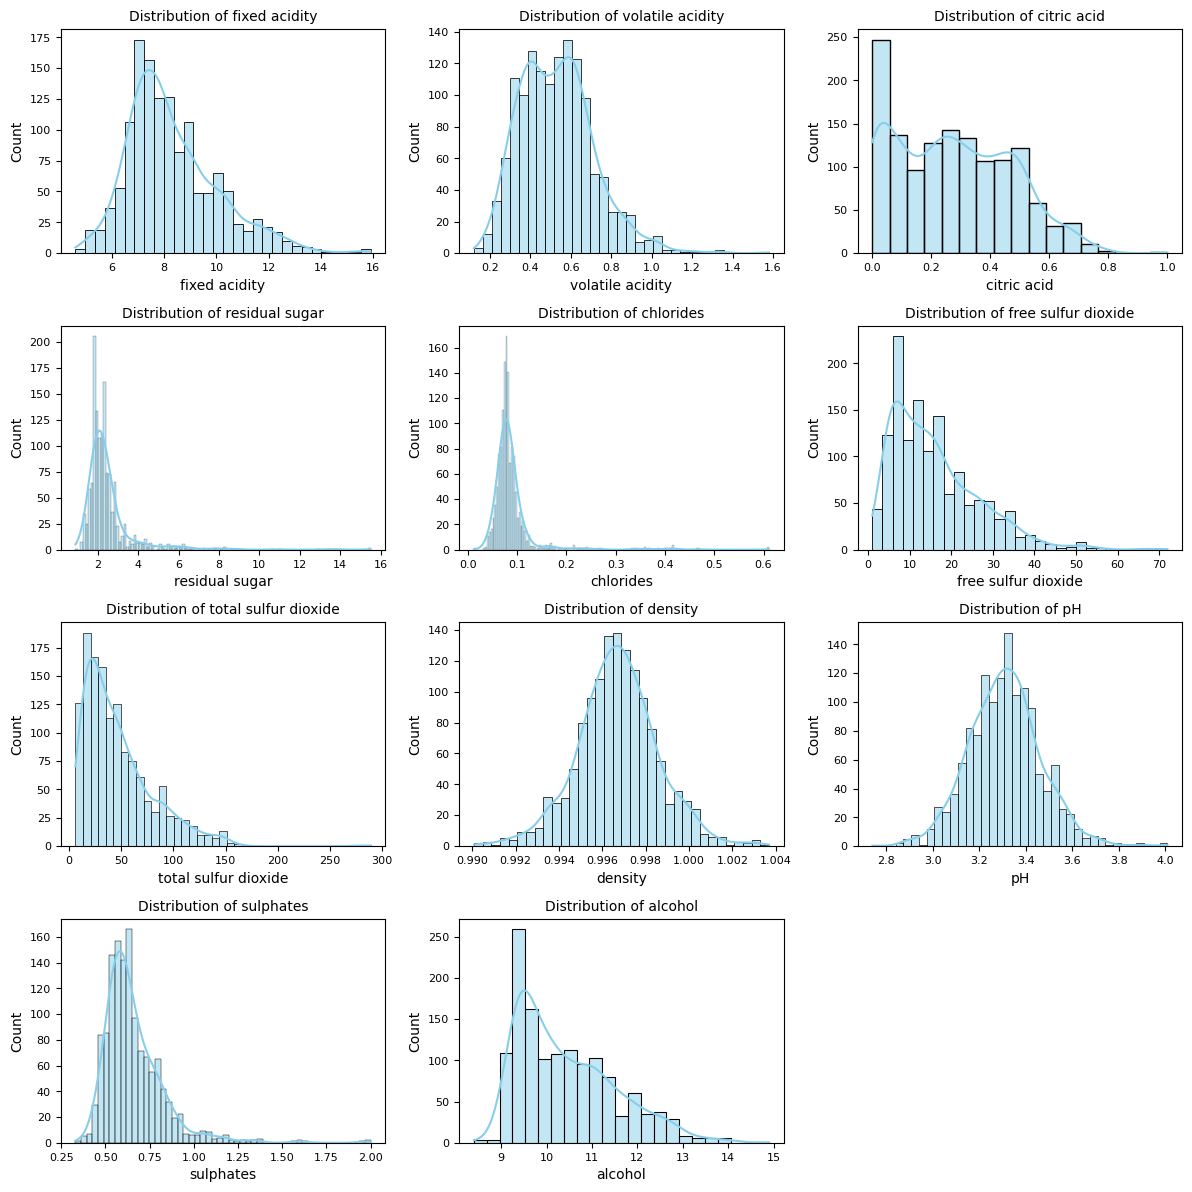

In [ ]:
# df.hist(bins=15, figsize=(15, 10))
# plt.tight_layout()
# plt.show()

numeric_cols = df.columns[:-1]  # exclude 'quality'
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].tick_params(labelsize=8)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=1)
plt.show()

### 2.Correlation heatmap

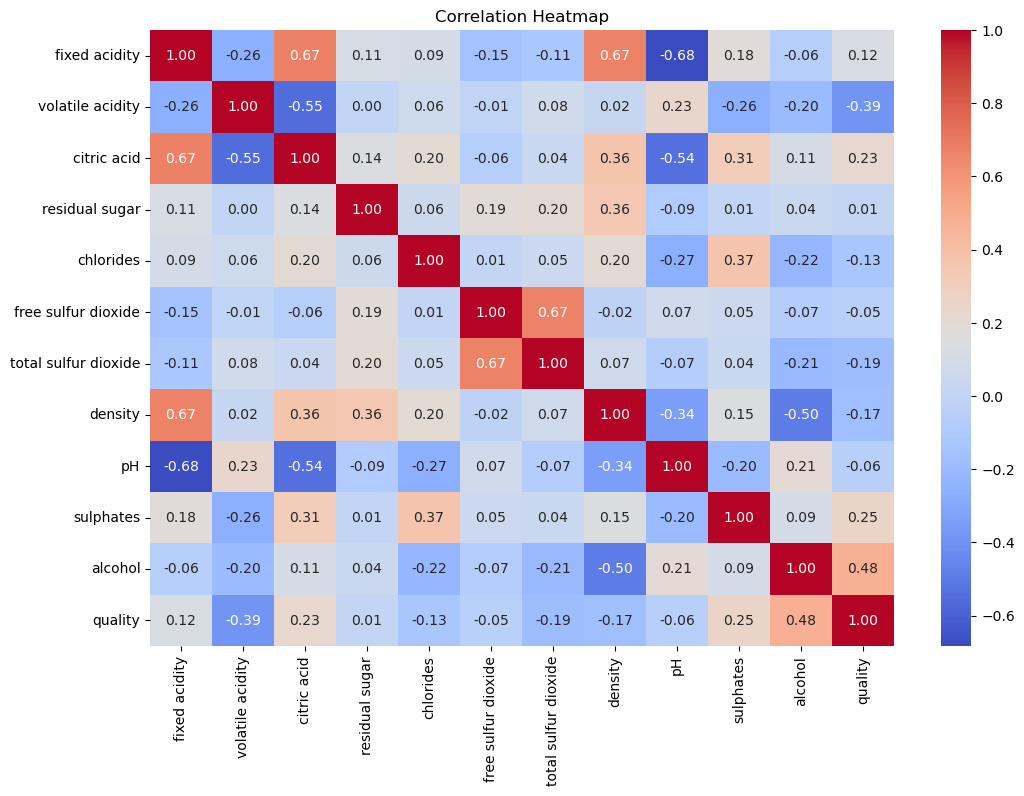

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



### 3.Countplot

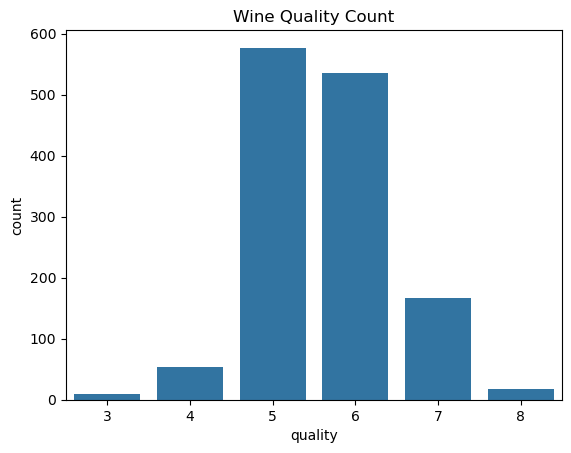

In [132]:
sns.countplot(x="quality", data=df)
plt.title("Wine Quality Count")
plt.show()

### 4.Boxplots

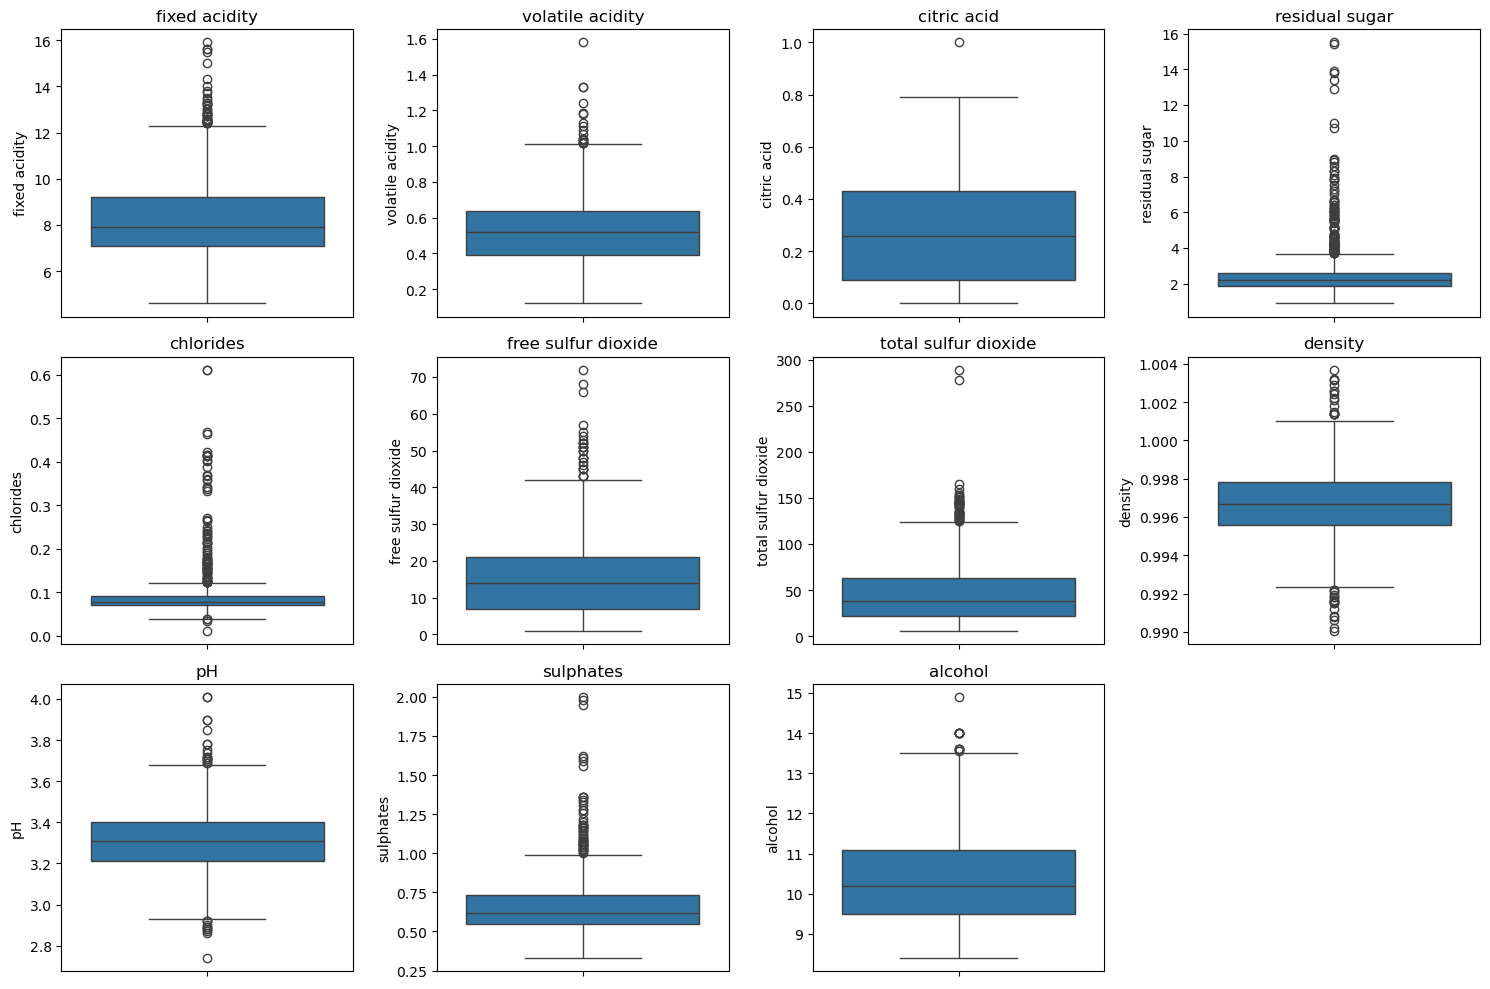

In [134]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1], 1):  # exclude 'quality'
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### 5.Scatterplots for selected feature vs quality

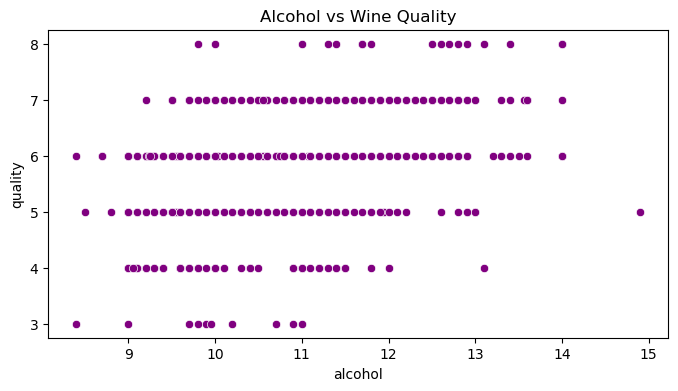

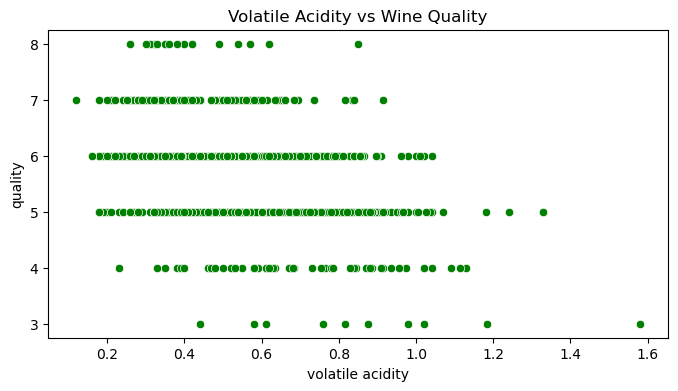

In [135]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='alcohol', y='quality', data=df, color='purple')
plt.title('Alcohol vs Wine Quality')
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(x='volatile acidity', y='quality', data=df, color='green')
plt.title('Volatile Acidity vs Wine Quality')
plt.show()

In [115]:
# Handle Duplicates
print("\nNumber of duplicates:", df.duplicated().sum())


Number of duplicates: 240


In [116]:
if df.duplicated().sum() > 0:
    print("\nDuplicate rows (before removal):")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))
    df = df.drop_duplicates()
    print(f"\nRemoved {df.duplicated().sum()} duplicates. New shape:", df.shape)


Duplicate rows (before removal):
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
142             5.2             0.340         0.00             1.8      0.050   
144             5.2             0.340         0.00             1.8      0.050   
131             5.6             0.500         0.09             2.3      0.049   
132             5.6             0.500         0.09             2.3      0.049   
1488            5.6             0.540         0.04             1.7      0.049   
...             ...               ...          ...             ...        ...   
391            13.7             0.415         0.68             2.9      0.085   
243            15.0             0.210         0.44             2.2      0.075   
244            15.0             0.210         0.44             2.2      0.075   
554            15.5             0.645         0.49             4.2      0.095   
555            15.5             0.645         0.49             4.2      0.0

In [117]:
print("\nNumber of duplicates:", df.duplicated().sum())


Number of duplicates: 0


In [118]:
# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

In [119]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (very important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)